# <font color='red'>Kepler's Data Set on Mars</font>
1. Here we are trying to follow thw path used by kepler to find th eorbit of mars .
2. He did all the calculation by his hand. 
3. We are not going through the entire process .
4. In this program we are just trying to fit the mars orbit to a circle using the concept of Average Sun
5. For the Mars opposition data [Mars opposition data](https://ece.iisc.ac.in/~rajeshs/E0259/01_data_mars_opposition.csv)

Find mars orbit
1. First we import all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math  
from scipy.optimize import minimize
from scipy.stats.mstats import gmean  

1. read the CSV file to df which contains Mars opposition data
2. Extra columns angle Angle_With_Sun	Angle_With_AverageSun created
3. Then drr from df is created with the requied columns(All the columns which was not required are removed)
 

In [2]:
df = pd.read_csv('01_data_mars_opposition.csv')
df

,Day,Month,Year,ZodiacIndex,Degree,Minute,Second,LatDegree,LatMinute,ZodiacIndexAverageSun,DegreeMean,MinuteMean,SecondMean
0,18,11,1580,2,6,28,35,1,40,1,25,49,31
1,28,12,1582,3,16,55,30,4,6,3,9,24,55
2,30,1,1585,4,21,36,10,4,32,4,20,8,9
3,6,3,1587,5,25,43,0,3,41,6,0,47,40
4,14,4,1589,7,4,23,0,1,12,7,14,18,26
5,8,6,1591,8,26,43,0,-4,0,9,5,43,55
6,25,8,1593,11,12,16,0,-6,-2,11,9,49,31
7,31,10,1595,1,17,31,40,0,8,1,9,55,4
8,13,12,1597,3,2,28,0,3,33,2,23,11,56
9,18,1,1600,4,8,38,0,4,30,4,4,35,50


In [3]:
df['Angle_With_Sun']=df['ZodiacIndex']*30+df['Degree']+df['Minute']/60+df['Second']/3600

In [4]:
df['Angle_With_AverageSun']=df['ZodiacIndexAverageSun']*30+df['DegreeMean']+df['MinuteMean']/60+df['SecondMean']/3600

In [5]:
drr = df[['Angle_With_Sun','Angle_With_AverageSun']]

In [6]:
drr

,Angle_With_Sun,Angle_With_AverageSun
0,66.476389,55.825278
1,106.925000,99.415278
2,141.602778,140.135833
3,175.716667,180.794444
4,214.383333,224.307222
5,266.716667,275.731944
6,342.266667,339.825278
7,47.527778,39.917778
8,92.466667,83.198889
9,128.633333,124.597222


### <font color='red'>Function which calculates Distace of mars from centre</font>

In [7]:
a = math.pi / 180
alpha = drr.iloc[:,0].values
beta = drr.iloc[:,1].values
r = np.zeros(12)
Mx = np.zeros(12)
My = np.zeros(12)
def rad(alpha,beta,x,y):
    for i in range(12):
        v = math.tan((alpha[i]-y)*a)
        b = math.tan((beta[i]-y)*a)
        M_x = (x*b+v)/(v-b)
        M_y = (M_x-1)*v
        Mx[i] = M_x
        My[i] = M_y
        r[i] = math.sqrt(M_y*M_y+M_x*M_x)   
    return r

### <font color='red'>Function which calculates loss</font>

In [8]:
def objective(x0):
    x,y = x0
    s=0
    radius = rad(alpha,beta,x,y)
    radius_am = np.mean(radius)
    radius_gm = gmean(radius)
    loss = math.log10(radius_am) - math.log10(radius_gm)
    return loss

### <font color='red'>Calling library for minimizing loss function</font>

In [9]:
x0 = [10,100]
par = minimize(objective,x0, bounds=((0, 1000), (0, 180)))

### <font color='red'>printing the parameters</font>

In [10]:
print ('parameters')
print (par.x)

parameters
[  0.95178758 148.874814  ]


In [11]:
print (par)

      fun: 0.001779673885176969
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-6.50590692e-06, -4.95159469e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 90
      nit: 22
   status: 0
  success: True
        x: array([  0.95178758, 148.874814  ])


### <font color='red'>printing the distance of mars from 12 observations</font>

In [12]:
print('printing the distance of mars from 12 observations')
print (r)

printing the distance of mars from 12 observations
[10.45984847 10.62634966 10.59235678 10.77680093 10.58576963 10.47069431
  9.67944934 14.16966827 10.52315821 10.46892156 11.24032127 10.74904121]


### <font color='red'>ploting the mars position with center sun and average sun</font>

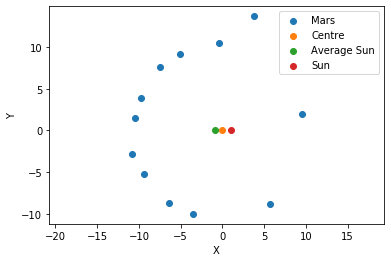

In [13]:
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(Mx,My,label="Mars") 
plt.scatter(0,0,label="Centre")
plt.scatter(-par.x[0],0,label="Average Sun")
plt.scatter(1,0,label="Sun")
plt.axis("equal")
plt.legend()